<a href="https://colab.research.google.com/github/sandraliz/Covid-19-Analysis/blob/main/Day_6_CSI_COVID_DATA_Analysis_Logistic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files 
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
uploaded = files.upload()

Saving covid_19_india-nov.csv to covid_19_india-nov.csv


In [5]:
data1 = pd.read_csv('covid_19_india-nov.csv') 
data1.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
data1['Date'] = pd.to_datetime(data1['Date'],format='%d/%m/%y')

In [10]:

confirmed_total_date = pd.DataFrame(data1.groupby('Date')['Confirmed'].sum())
deceased_total_date = pd.DataFrame(data1.groupby('Date')['Deaths'].sum())

In [11]:
confirmed_total_date

,Confirmed
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,2
2020-02-02,3
2020-02-03,3
...,...
2020-11-12,8683916
2020-11-13,8728795
2020-11-14,8773479


In [12]:
df = pd.DataFrame(confirmed_total_date)

In [13]:
df.shape

(292, 1)

In [15]:
x1 = list(np.arange(0,len(df),1))

In [16]:
y1 = list(df.iloc[:,0])

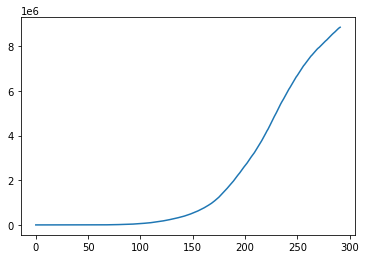

In [17]:
plt.plot(x1,y1)

In [18]:
def f_sigmoid(x,a,b,c):
    return c/(1+np.exp(-(x-b)*a))

In [19]:
initial_guess = 1, 150, 500000
fit = curve_fit(f_sigmoid,x1,y1,p0=initial_guess)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [20]:
fit

(array([3.62774172e-02, 2.27549026e+02, 9.63943736e+06]),
 array([[ 7.64118355e-09, -8.21002841e-06, -1.07547588e+00],
        [-8.21002841e-06,  1.39555247e-02,  1.65065366e+03],
        [-1.07547588e+00,  1.65065366e+03,  2.19411412e+08]]))

In [21]:
speed, x_peak, y_max = fit[0]
print("speed = ", speed)
print("x_peak = ", x_peak)
print("y_max = ",y_max)

speed =  0.03627741724295939
x_peak =  227.5490262157295
y_max =  9639437.35554281


In [22]:
end = int(fsolve(lambda m: f_sigmoid(m, speed, x_peak, y_max) - y_max * 0.9999, x_peak)) 
print("end =", end)

end = 481


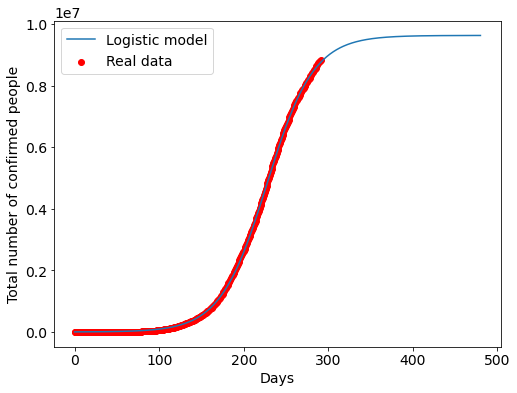

In [23]:
pred_x = list(range(max(x1),end))
plt.rcParams['figure.figsize'] = [8, 6]
plt.rc('font', size=14)
# Real data
plt.scatter(x1,y1,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x1+pred_x, [f_sigmoid(i,fit[0][0],fit[0][1],fit[0][2]) for i in x1+pred_x], label="Logistic model" )
plt.legend()
plt.xlabel("Days")
plt.ylabel("Total number of confirmed people")
#plt.ylim((min(y1)*0.9,c*1.1))
plt.show()


<function f_sigmoid at 0x7eff95d592f0>
